In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
data6 = pd.read_pickle('./output/data6.pickle')
data6.head()

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,Non-drinking,Non-smoking
1,Female,150,65,81.0,Non-drinking,Non-smoking
2,Female,155,55,70.0,Non-drinking,Non-smoking
3,Male,160,70,90.8,Non-drinking,Non-smoking
4,Female,155,50,75.2,Non-drinking,Non-smoking


In [7]:
# 음주 여부 및 흡연상태 데이터 준비하기

# data6에서 성별 음주 여부의 그룹별 개수(인원)를 구하여 drinking 에저장
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
drinking

gender  drinking    
Female  Non-drinking    305
        drinking        213
Male    Non-drinking    126
        drinking        356
Name: drinking, dtype: int64

In [8]:
# data6에서 성별 흡연상태의 그룹별 개수(인원)를 구하여 smoking에 저장
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
smoking

gender  smoking    
Female  Non-smoking    500
        smoking         18
Male    Non-smoking    321
        smoking        161
Name: smoking, dtype: int64

In [9]:
# 음주 여부와  흡연상태에 대한 그룹별 개수(인원)의 시리즈를 데이터 프레임으로 변경
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking

count
gender drinking           
Female Non-drinking    305
       drinking        213
Male   Non-drinking    126
       drinking        356

In [10]:
# 데이터프레임의 인덱스를 초기화
drinking = drinking.reset_index()
smoking = smoking.reset_index()
drinking

,gender,drinking,count
0,Female,Non-drinking,305
1,Female,drinking,213
2,Male,Non-drinking,126
3,Male,drinking,356


In [ ]:
#add_sibplot() 함수
#add_sibplot() 함수의 인자를 통해 서브 플롯 개수를 조정
#add_sibplot(1, 2, 1)은 1 X 2 (행 X 열) 의 서브 플롯을 생성한다는 의미이고
#세번쨰 인자 1 인 생성된 두개의 서브플롯중 첫번쨰 서브플롯을 의미
# 마찬가지로 (1, 2, 2)는 1X2 서브플롯에서 두번쨰 서브플롯을 의미

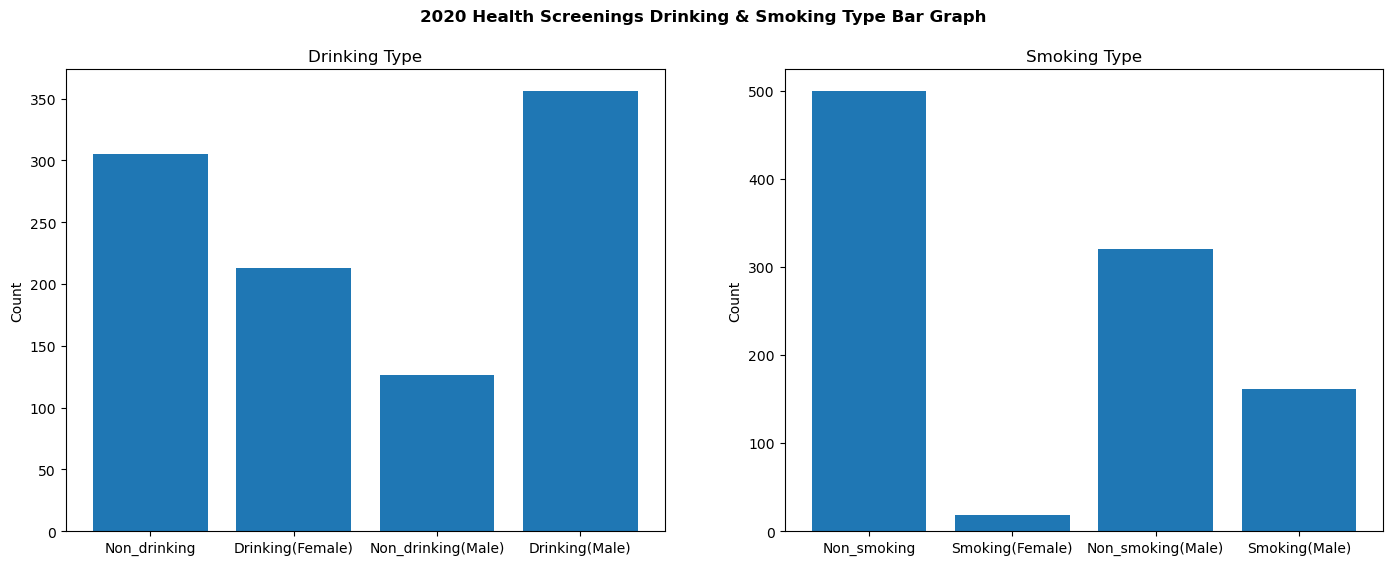

In [18]:
# 성별 음주여부 및 흡연상태 막대 그래프
fig = plt.figure(figsize=(17, 6)) # 그래프 크기 지정 및 그림 객체생성
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph', fontweight='bold')
index = np.arange(4) # X축 눈금 개수를 배열로 생성하고 index에 저장
# 2) 첫번쨰 서브 플롯설정
fig.add_subplot(1, 2, 1) # 1행 2열의 서브플롯중 첫번쨰 서브플롯 생성
# 첫번쨰 서브 플롯에 그려질 음주여부를 데이터개수(인원)을 baar() 함수를 이용하여 지정
plt.bar(index, drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
# x축 눈금 이름을 지정
plt.xticks(index, ['Non_drinking', 'Drinking(Female)', 'Non_drinking(Male)', 'Drinking(Male)'])
# 3) 두번쨰 서브 플롯설정
fig.add_subplot(1, 2, 2) # 1행 2열의 서브플롯중 두번쨰 서브플롯 생성
# 첫번쨰 서브 플롯에 그려질 흡연상태를 데이터개수(인원)을 baar() 함수를 이용하여 지정
plt.bar(index, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
# x축 눈금 이름을 지정
plt.xticks(index, ['Non_smoking', 'Smoking(Female)', 'Non_smoking(Male)', 'Smoking(Male)'])
plt.show()

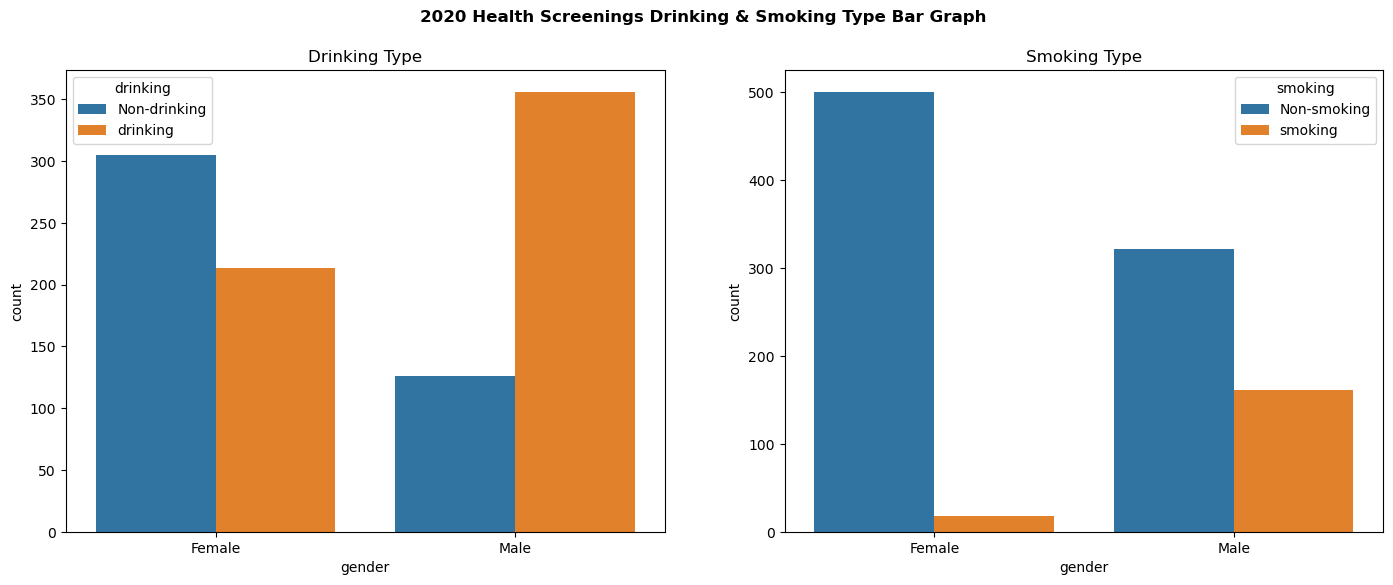

In [19]:
# 성별 음주 여부및 흡연상태 시본 그래프

fig = plt.figure(figsize=(17, 6))
# 1행 2열의 서브 플롯 생성
area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

#barplot() 함수를 이용하여 x축에 성별 y축에 음주여부 개수(인원) hue에 성별 음주 여부를 할당하여 첫번쨰 서브 플롯에 할당
ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)
#barplot() 함수를 이용하여 x축에 성별 y축에 흡연상태 개수(인원) hue에 성별 흡연상태 그룹별 데이터를 할당하여 두번쨰 서브 플롯에 할당
#두번쨰 서브 플롯에 할당
ax2 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=area2)

fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph', fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

plt.show()